In [ ]:
#@title Librerías
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def funcion(t,y,params):
  a = params[0]
  dydt = -a*y
  return dydt
#Condiciones iniciales

a = 1 #Parámetro de la ecuación diferencial
params = (a,) 
t0 = 0 #tiempo inicial
tfin = 1 #tiempo final
nt = 100 #número de tiempos
t = np.linspace(t0,tfin,100)
y0 = 100 #Condición inicial
h = 1/nt

k1 = funcion(t0,y0,params)
k2 = funcion(t0+(h/2) , y0+(h/2)*k1 ,params)
k3 = funcion(t0+(h/2) , y0+(h/2)*k2 , params)
k4 = funcion(t0+(h/2),y0+ h*k3,params)
kmean = (1/6)*(k1 + 2*k2 + 2*k3 + k4)
y1 = y0 + kmean*h
y1

99.004983375

In [ ]:
#Para el siguiente tiempo:
t1 = t0+h
k1 = funcion(t1,y1,params)
k2 = funcion(t1+(h/2) , y1+(h/2)*k1 ,params)
k3 = funcion(t1+(h/2) , y1+(h/2)*k2 , params)
k4 = funcion(t1+(h/2),y1+ h*k3,params)
kmean = (1/6)*(k1 + 2*k2 + 2*k3 + k4)
y2 = y1 + kmean*h
y2

98.01986733084026

In [ ]:
#Generalicemos para n pasos
def nPasos(t,y0,params):
  nt = len(t)
  h = 1/nt
  y_ = np.zeros(nt)
  y_[0] = y0
  for i in range(nt-1):
    k1 = funcion(t[i],y_[i],params)
    k2 = funcion(t[i] + (h/2) , y_[i] + (h/2)*k1 ,params)
    k3 = funcion(t[i] + (h/2) , y_[i] + (h/2)*k2 , params)
    k4 = funcion(t[i] +  h    , y_[i] +  h*k3    ,params)
    kmean = (1/6)*(k1 + 2*k2 + 2*k3 + k4)
    #if i+1>=len(t):
      #return y_
    y_[i+1] = y_[i] + kmean*h
  return y_

In [ ]:
#Condiciones iniciales
a = 1 #Parámetro de la ecuación diferencial
params = (a,) 
t0 = 0 #tiempo inicial
tfin = 1 #tiempo final
nt = 100 #número de tiempos
t = np.linspace(t0,tfin,nt)
y0 = 100 #Condición inicial
h = 1/nt
y = nPasos(t,y0,params)

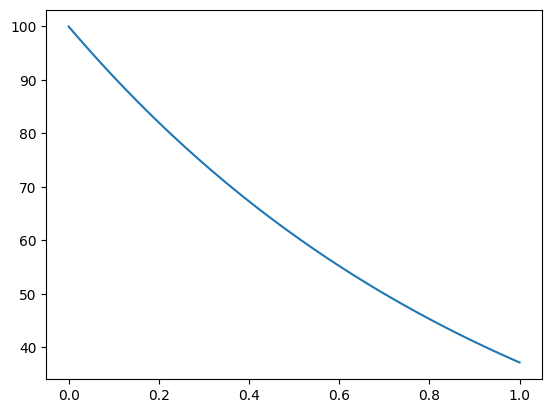

In [ ]:
plt.plot(t,y);

##Atractor De Lorenz
$\frac{dx}{dt} = \sigma(y-x)$\
$\frac{dx}{dt} = x(\rho -z ) -y$ \
$\frac{dx}{dt} = xy - \beta z$

In [ ]:
#Funciones por separado.
def funcionX(t,x,y,z,params):
  sigma = params[0]
  dxdt = sigma*(y-x)
  return dxdt

def funcionY(t,x,y,z,params):
  a = params[0]
  rho = params[1]
  dydt = x*(rho-z)-y
  return dydt

def funcionZ(t,x,y,z,params):
  a = params[0]
  beta = params[2]
  dzdt = x*y-beta*z
  return dzdt

In [ ]:
def atractorLorenz(t,r0,params):
  #Desempaquetamos los datos iniciales.
  x0 = r0[0]
  y0 = r0[1]
  z0 = r0[2]
  h = 0.001
  t0 = t[0]
  tfinal = t[1]
  t_ = np.arange(t[0], t[1], h)

  #Creamos el array de soluciones
  solX = np.zeros(len(t_)) 
  solY = np.zeros(len(t_))
  solZ = np.zeros(len(t_))

  #Realicemos el algoritmo de rungekutta
  for i in range(0,len(t_)):

    #Para la primera edo.
    k1 = funcionX(t0,x0,y0,z0,params)
    k2 = funcionX(t0+h/2,x0+h/2*k1,y0,z0,params)
    k3 = funcionX(t0+h/2,x0+h/2*k2,y0,z0,params)
    k4 = funcionX(t0+h,x0+h*k3,y0,z0,params)
    kmean = (1/6)*(k1+2*k2+2*k3+k4)
    x1 = x0 +  kmean*h
    solX[i] = x1 
    
    #Para la segunda edo.
    m1 = funcionY(t0,x0,y0,z0,params)
    m2 = funcionY(t0+h /2,x0,y0+h/2*m1,z0,params)
    m3 = funcionY(t0+h/2,x0,y0+h/2*m2,z0,params)
    m4 = funcionY(t0+h,x0,y0+h*m3,z0,params)
    mmean = (1/6)*(m1+2*m2+2*m3+m4)
    y1 = y0+mmean*h
    solY[i] = y1

    #Para la tercera edo.
    o1 = funcionZ(t0,x0,y0,z0,params)
    o2 = funcionZ(t0+h/2,x0,y0,z0+h/2*o1,params)
    o3 = funcionZ(t0+h/2,x0,y0,z0+h/2*o2,params)
    o4 = funcionZ(t0+h,x0,y0,z0+h*o3,params)
    omean = (1/6)*(o1+2*o2+2*o3+o4)
    z1 = z0+omean*h
    solZ[i] = z1
    
    #Establecemos los datos del siguiente ciclo
    x0 = x1
    y0 = y1
    z0 = z1

    #tiempos
    t1 = t0+h
    t0 = t1

  return np.array((solX,solY,solZ))

In [ ]:
#Condiciones iniciales
sigma = 10
rho = 97
beta = (8/3)
x0 = 1
y0 = 1
z0 = 1

r0 = np.array([x0,y0,z0])
params = np.array([sigma,rho,beta])

#tiempo
t0 = 0
tfinal = 40
t = np.array([t0,tfinal])
dt = h = 0.001
t_ = np.arange(0, 40, dt)

atractor = atractorLorenz(t,r0,params)
x,y,z = atractor[0] ,atractor[1] ,atractor[2]

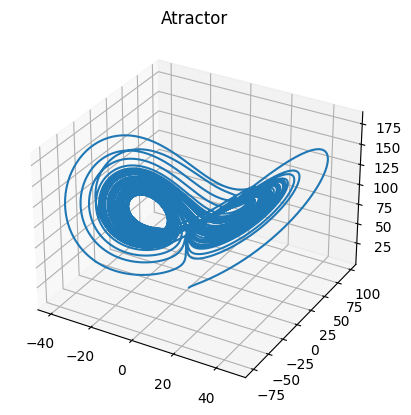

In [ ]:
#Graficamos
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z)
ax.set_title('Atractor');